In [1]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

# Class Activation Map (CAM)

In [2]:
# Keras Imports
import random
from tensorflow.keras import models
from tensorflow.keras.models import Model


import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import load_img, img_to_array
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from tensorflow.keras.layers import GlobalAveragePooling2D
# Other imports
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import load_model

In [3]:
# load model
model = load_model("./models/vgg_malaria.h5")

In [4]:

# summarize model.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 132, 132, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 132, 132, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 132, 132, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 66, 66, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 66, 66, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 66, 66, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 33, 33, 128)       0     

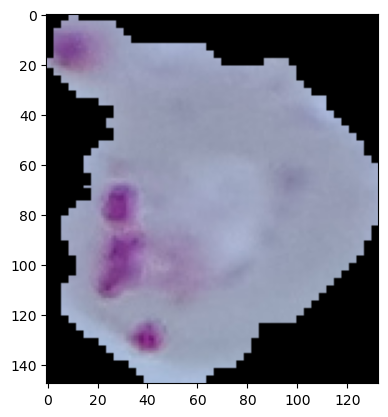

In [5]:
img_path = './images/third_test.png'
path = './cell_images/'

img = cv2.imread(img_path)

plt.imshow(img)
plt.show()


In [6]:
# # BGR2RGB
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# #Resizing it to (132,132,3)
# img = cv2.resize(img,(132,132))

# #Expand dims in axis = 0
# img = np.expand_dims(img, axis=0)

# # Generate prediction
# pred = model.predict(img)

# # Generate prediction class
# pred_output = model.output[:, np.argmax(pred)]

# # Feature map of 'conv last' layer, which is the last convolution layer
# last_conv_layer = model.layers[-6]

# # create a functional model
# last_conv_layer_model = Model(model.inputs, last_conv_layer.output)

# # New model's input shape
# classifier_input = Input(shape=last_conv_layer.output.shape[1:])
# x = classifier_input

# # My model's classification layers (add layer names from last conv layer upto prediction layer)
# classifier_layer_names = ["conv_7b_bn","conv_7b_ac",'global_average_pooling2d_1','dense_2','dense_3']
# # classifier_layer_names = ["block5_pool", "global_average_pooling2d" , "dense", "dense_1"]


# for layer_name in classifier_layer_names:
#     x = model.get_layer(layer_name)(x)

# # Functional model creation
# classifier_model = Model(classifier_input, x)

# # Compute gradients
# with tf.GradientTape() as tape:
#     last_conv_layer_output = last_conv_layer_model(img)
#     tape.watch(last_conv_layer_output)
    
#     preds = classifier_model(last_conv_layer_output)
#     top_pred_index = tf.argmax(preds)
#     top_class_channel = preds[:, top_pred_index]
    
# grads = tape.gradient(top_class_channel, last_conv_layer_output)
# pooled_grads = tf.reduce_mean(grads, axis=(0, 1,2))

# last_conv_layer_output = last_conv_layer_output.numpy()[0]
# pooled_grads = pooled_grads.numpy()
# for i in range(pooled_grads.shape[-1]):
#     last_conv_layer_output[:, :, i] *= pooled_grads[i]

# #Calculate heat map
# heatmap = np.mean(last_conv_layer_output, axis=2)
# heatmap = np.maximum(heatmap, 0)

    
# heatmap = np.uint8(255*heatmap)


# # apply jet color map
# #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# heatmap = cv2.resize(heatmap,(132,132))
# heatmap = heatmap.reshape((132,132))


# plt.figure(figsize = [10,10])
# plt.subplot(1,2,1)
# plt.imshow(img.reshape(132,132,3))
# plt.axis("off");

# plt.subplot(1,2,2)
# plt.imshow(heatmap,cmap = 'jet')
# plt.axis("off");


# # #  NOT GENERATING PROPER HEATMAP

In [7]:
#  resizing the image to fit in the model

x = cv2.resize(img, (132,132))

# expand the dimensions to (1,132,132,3)
x = np.expand_dims(x,axis = 0)


import tensorflow.keras.applications.vgg19 as vgg19

# prerprocess the input so as to convert rgb to bgr and then zero centers each color channel

x = vgg19.preprocess_input(x)

print(x)

[[[[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  ...

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]]

  [[-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   ...
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 -123.68 ]
   [-103.939 -116.779 

In [8]:
preds = model.predict(x)
preds

if preds > 0.5:
    print("Uninfected")
else:
    print("parasitized")

1/1 [==============================] - 0s 363ms/step
parasitized


In [9]:
last_conv_layer = model.get_layer('block5_conv4')

print(model.inputs)

model_fm = tf.keras.Model(inputs = model.input, outputs=[
    model.output,
    last_conv_layer.output
])

[<KerasTensor: shape=(None, 132, 132, 3) dtype=float32 (created by layer 'input_1')>]


In [10]:
# feeding the image to altered model

model_out, feature_maps = model_fm.predict(x)

print(model_out)
feature_maps = np.squeeze(feature_maps)
model_out = np.squeeze(model_out)

print(feature_maps.shape)

print(model_out.shape)

1/1 [==============================] - 0s 283ms/step
[[0.]]
(8, 8, 512)
()


In [11]:
# get weights of last dense layer
weights = model.layers[-2].weights[0]
print(weights.shape)     

max_idx = np.argmax( model_out )
print(max_idx)

(512, 1024)
0


In [12]:
winning_weights = weights[:, max_idx]
print(winning_weights.shape)

(512,)


In [13]:
# CAM = np.zeros(feature_maps.shape[:2])
# for k, wk in enumerate(winning_weights):
#     # get feature map k
    
#     # print(feature_maps.shape)
#     if k < feature_maps.shape[2]:
#         feature_map_k = feature_maps[..., k]

#         # get activation of map k (multiply Fk with wk)
#         activation_k = feature_map_k * wk

#         CAM += activation_k

In [14]:
CAM = np.sum(feature_maps * winning_weights, axis=2)

In [15]:
CAM

array([[ 8.57028809e+01,  3.47118301e+01,  2.97193050e+00,
        -2.90973926e+00, -3.73525572e+00, -8.37256432e+00,
        -1.17727718e+01, -1.56823874e+01],
       [ 2.59356117e+01,  4.53394032e+00, -1.93751073e+00,
        -5.81121540e+00, -6.37686300e+00, -7.89723110e+00,
        -6.34381485e+00, -9.03211403e+00],
       [ 6.73427391e+00,  2.25596905e+00,  7.44388103e-02,
        -6.56649733e+00, -7.28585386e+00, -6.98029137e+00,
        -3.65769935e+00, -3.27753520e+00],
       [-1.20577869e+01, -1.42953110e+00, -6.52587295e-01,
        -4.52513361e+00, -6.03334141e+00, -3.41499996e+00,
        -5.87809801e-01,  1.73868346e+00],
       [ 2.71474457e+00,  3.08012180e+01,  3.81862869e+01,
        -1.27938056e+00, -3.74648046e+00, -2.23061490e+00,
        -2.11931229e+00,  5.80460739e+00],
       [ 1.08983135e+01,  4.00454140e+01,  6.90005646e+01,
         2.50573921e+01,  3.03605986e+00, -8.84415746e-01,
         1.84568155e+00,  6.71040630e+00],
       [ 2.56633878e+00,  2.713784

In [28]:
final = cv2.resize(img, (132,132))
print(final.shape)
heatmap = cv2.resize(np.array(CAM), (132,132))
print(heatmap.shape)
# heatmap = cv2.cvtColor(heatmap, cv2.COLOR_GRAY2RGB)

(132, 132, 3)
(132, 132)


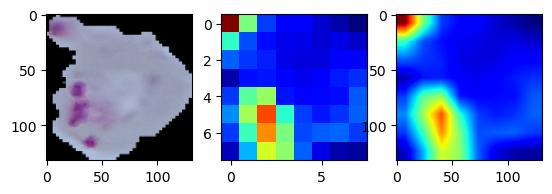

In [17]:
plt.subplot(1,3,1)
plt.imshow(final)
# plt.axis("off");

plt.subplot(1,3,2)
plt.imshow(CAM, cmap = 'jet')

plt.subplot(1,3,3)
plt.imshow(heatmap, cmap = 'jet')
# plt.axis("off");

In [18]:
print(final.shape)
print(CAM.shape)
print(heatmap.shape)

(132, 132, 3)
(8, 8)
(132, 132)


In [19]:
# final = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)

In [20]:
print(final.dtype)
print(CAM.dtype)
print(heatmap.dtype)

uint8
float32
float32


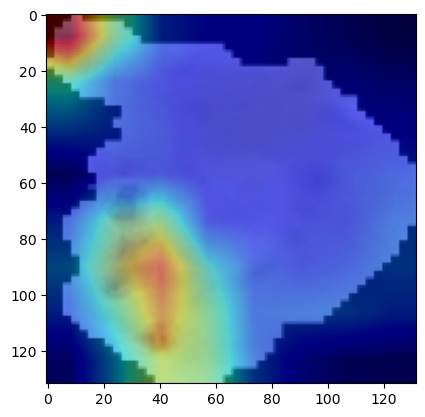

In [30]:
plt.imshow(final)
plt.imshow(heatmap, cmap='jet', alpha=0.5)